In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

from sklearn.preprocessing import MinMaxScaler

In [3]:
wav_fname = "proc_384_f32le.wav"

sample_rate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / sample_rate
print(f"length = {length}s")

data = data[:, 1]

number of channels = 2
length = 947.7119973958334s


In [ ]:
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)

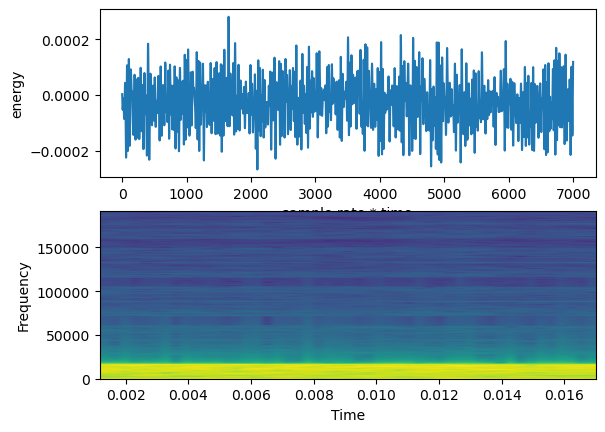

In [4]:
sig_sample = data[25000:32000]

#time = np.linspace(0., length, data.shape[0])
time = np.linspace(0, len(data) / sample_rate, num=len(sig_sample))

plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig_sample)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig_sample, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

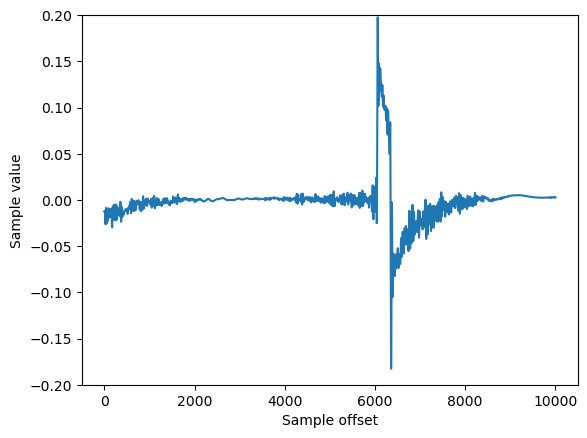

In [55]:
offset = 20800000
chunk = data[offset:offset+10000]
plt.plot(range(len(chunk)), chunk)
plt.ylim([-0.2, 0.2])
plt.xlabel("Sample offset")
plt.ylabel("Sample value")  
plt.show()

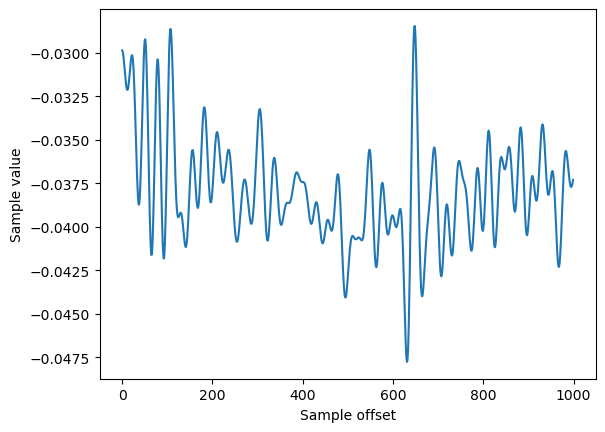

In [57]:
offset = 3000000  
chunk = data[offset:offset+1000]
plt.plot(range(len(chunk)), chunk)
plt.xlabel("Sample offset")
plt.ylabel("Sample value")  
plt.show()

In [58]:
def findNext(data, offset) -> float:
    lookahead = 850
    max = data[offset:offset+lookahead].max()

    maxInterImageSamples = 10000
    pulseCount = 0
    triggerCount = 2
    lowLevel = 0
    highLevelReachedCounter = 0

    lowLevel = max * 0.1;
    for i in range(-100, maxInterImageSamples):
        if data[offset] == max:
            highLevelReachedCounter = 60
        
        highLevelReachedCounter -= 1

        if data[offset] > lowLevel:
            pulseCount += 1
        else:
            pulseIsLongEnough = pulseCount > triggerCount
            maxWasRecent = highLevelReachedCounter > 0

            if pulseIsLongEnough and maxWasRecent:
                return offset
        
            pulseCount = 0
            highLevelReachedCounter = 0
        
        offset += 1
    
    return offset

In [59]:
def plotNext(data, offset, width=1000, height=512):
    image_data = []
    for i in range(0, height):
        image_data.append(data[offset:offset+width])
    
    plt.imshow(image_data)


In [60]:
next_offset = 6000000

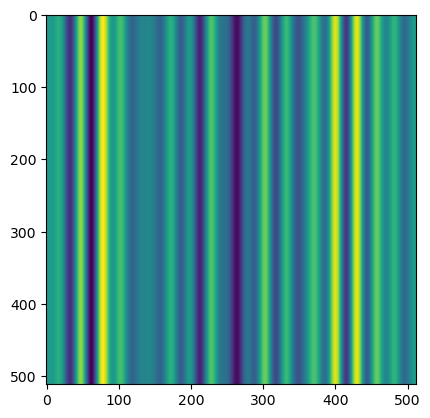

In [73]:
next_offset = findNext(data, next_offset)
plotNext(data, next_offset, 512)

In [ ]:
scan_width = 300
image_data = []
for scan in range(512):
    scan_offset = findNext(single_channel, scan_offset)
    image_data.append(single_channel[int(scan_offset):int(scan_offset)+scan_width])
    scan_offset += scan_width

plt.imshow(image_data, cmap="Blues")
plt.show()